## Problem 2

A Preprocessing and a Training Loop to train a Linear Regression Model that predicts Housing Price based on the following Input Variables will be developed:

area, bedroom, bathrooms, stories, parking

For this problem, the "housing.csv" dataset will be used. For training and validation, 80% and 20% split will be used. The best parameters for the Linear Regression model will be identified and in this case, there will be 6 parameters:

U = (W5 * X5) + (W4 * X4) + (W3 * X3) + (W2 * X2) + (W1 * X1) + B

5000 epochs will be used for the training and different learning rates from 0.1 to 0.0001 will be explored and the loss for every 500 epochs per training will be reported.

In [73]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Pytorch and Tensorflow
import torch
torch.version.__version__
import torch.optim as optim
import torch.nn as nn

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [74]:
# Importing the "Housing.csv" Dataset for Problem 2
Housing_DF = pd.DataFrame(pd.read_csv("Housing.csv")) 

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
New_train = Housing_DF[num_vars]
Y = New_train.pop('price').to_numpy(np.float64)
X = New_train.to_numpy(np.float64)

In [75]:
# Predefined Function for Housing DataSet

def model_house(x, w, b):
  return np.matmul(x, w) + b
def dmodel_dw1_house(x, w, b):
  return x[:,0]
def dmodel_dw2_house(x, w, b):
  return x[:,1]
def dmodel_dw3_house(x, w, b):
  return x[:,2]
def dmodel_dw4_house(x, w, b):
  return x[:,3]
def dmodel_dw5_house(x, w, b):
  return x[:,4]
def dmodel_db_house(x, w, b):
  return 1.0

In [76]:
# Gradient Function
def Grad_Fn_Housing_Ds(x, y, pred, w, b):
  dloss_dtp = dloss_fn(pred, y)
  dloss_dw1 = dloss_dtp * dmodel_dw1_house(x, w, b)
  dloss_dw2 = dloss_dtp * dmodel_dw2_house(x, w, b)
  dloss_dw3 = dloss_dtp * dmodel_dw3_house(x, w, b)
  dloss_dw4 = dloss_dtp * dmodel_dw4_house(x, w, b)
  dloss_dw5 = dloss_dtp * dmodel_dw5_house(x, w, b)
  dloss_db = dloss_dtp * dmodel_db_house(x, w, b)
  return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_dw3.sum(), dloss_dw4.sum(), dloss_dw5.sum(), dloss_db.sum()])
 
def training_loop_Housing_Ds(n_epochs, learning_rate, params, X, Y):
  for epoch in range(1, n_epochs + 1):
    b = params[-1]
    w = params[:-1]

    pred = model_house(X, w, b)
    loss = loss_fn(pred, Y)
    grad = Grad_Fn_Housing_Ds(X, Y, pred, w, b)
  
    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params

In [77]:
# Loss Function
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

In [78]:
X_max = np.amax(X, axis=0)
Y_max = np.amax(Y)

X_new = X
Y_new = Y 

# Normalization of the Parameters
X_new[:,0] = X[:,0] / X_max[0]
X_new[:,1] = X[:,1] / X_max[1]
X_new[:,2] = X[:,2] / X_max[2]
X_new[:,3] = X[:,3] / X_max[3]
X_new[:,4] = X[:,4] / X_max[4]


X_new = torch.tensor(X_new)
Y_new = torch.tensor(new_y)


params = training_loop_Housing_Ds(n_epochs = 5000, learning_rate = 1e-1, params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
                             X = X_new, Y = Y_new)

Epoch 500, Loss 1562038499136.447754
Epoch 1000, Loss 1533011436311.196289
Epoch 1500, Loss 1531161953474.365967
Epoch 2000, Loss 1531023620738.500000
Epoch 2500, Loss 1531010431223.014648
Epoch 3000, Loss 1531008830650.815186
Epoch 3500, Loss 1531008603760.256592
Epoch 4000, Loss 1531008569139.817139
Epoch 4500, Loss 1531008563697.867432
Epoch 5000, Loss 1531008562832.778076


tensor(7648876.7399, dtype=torch.float64)
tensor(13300000., dtype=torch.float64)


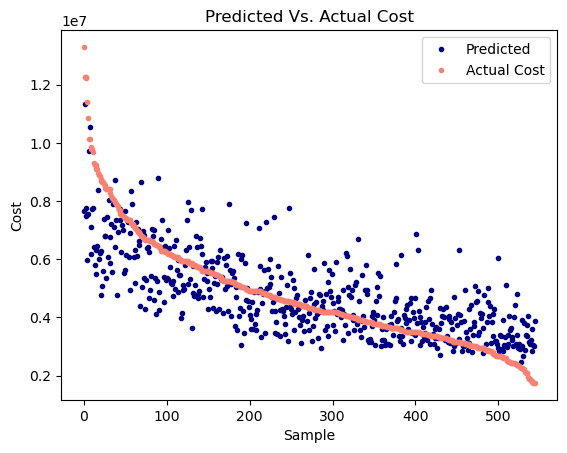

In [79]:
# Plot datapoints and the paramters
from matplotlib import pyplot as plt

pred = model_house(new_x, params[:-1], params[-1])
print(pred[0])
print(new_y[0])
fig = plt.figure()
plt.xlabel("Sample")
plt.ylabel("Cost")
plt.title("Predicted Vs. Actual Cost")
plt.plot(pred.detach().numpy(), '.', label = "Predicted", color = "navy")
plt.plot(new_y.numpy(), '.', label = "Actual Cost", color = "salmon")
plt.legend();

In [82]:
# Training the Model with Different Learning Rates (1e-2, 1e-3, & 1e-4)
params = training_loop_Housing_Ds(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
                             X = X_new, Y = Y_new)

Epoch 500, Loss 2024805783902.583984
Epoch 1000, Loss 1863258466727.914307
Epoch 1500, Loss 1768051362590.842285
Epoch 2000, Loss 1704595000950.190430
Epoch 2500, Loss 1659789065346.188721
Epoch 3000, Loss 1627244053690.387207
Epoch 3500, Loss 1603242094079.036621
Epoch 4000, Loss 1585383250941.523193
Epoch 4500, Loss 1572022959620.682617
Epoch 5000, Loss 1561993317652.091797


## Problem 3

A fully connected Neural Network will be built for the "Housing.csv" Dataset. For training and validation, 80% and 20% split will be used. For this part, only one hidden layer with 8 nodes will be used. The Network will be trained for 200 epochs. The training time, training loss, and evaluation accuracy after 200 epochs will be reported. 

The Network, built in the previous part, will be extended with two more additional hidden layers.The Network will be trained for 200 epochs.The training time, training loss, and evaluation accuracy after 200 epochs will be reported.

In [83]:
num_vars = ["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea", "price"]

varList = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']

# Applying the Binary Mapping Technique (Converting Yes or No to either 1 or 0)
def binary_map(x):
    return x.map({'yes':1,"no":0})

Housing_DF[varList] = Housing_DF[varList].apply(binary_map)

In [84]:
# Code Snippet to Ignore and get rid of the Warnings
import warnings
warnings.filterwarnings("ignore")

In [85]:
# Application of Standard Scaler
STD_Scaler = StandardScaler()

# Splitting the Data into Training and Validation(Test) set
DF_train, DF_test = train_test_split(Housing_DF, train_size = 0.8, test_size = 0.2, random_state = 0)

DF_New_train = DF_train[num_vars]
DF_New_test = DF_test[num_vars]

# scaling the data
DF_New_train[num_vars] = STD_Scaler.fit_transform(DF_New_train[num_vars])
DF_New_test[num_vars] = STD_Scaler.fit_transform(DF_New_test[num_vars])

Y_New_train = DF_New_train.pop('price')
X_New_train = DF_New_train
Y_New_test = DF_New_test.pop('price')
X_New_test = DF_New_test

# convert the data to tensors
X_train = torch.tensor(X_New_train.values).float()
X_val = torch.tensor(X_New_test.values).float()
Y_train = torch.tensor(Y_New_train.values).float().unsqueeze(-1)
Y_val = torch.tensor(Y_New_test.values).float().unsqueeze(-1)
print(Y_val.size())

torch.Size([109, 1])


In [86]:
def training_loop(n_epochs, optimizer, model, Loss_fn, X_train, X_val, Y_train, Y_val):
    for epoch in range(1, n_epochs + 1):
        P_train = model(X_train) 
        Loss_train = loss_fn(P_train, Y_train)

        P_val = model(X_val) 
        Loss_val = loss_fn(P_val, Y_val)
        
        optimizer.zero_grad()
        Loss_train.backward() 
        optimizer.step()


        if epoch == 1 or epoch % 10 == 0:
            print(f"Epoch: {epoch}, Training loss: {Loss_train.item():.4f},"
                  f" Validation loss: {Loss_val.item():.4f}")

In [87]:
Model_a = nn.Sequential(
            nn.Linear(len(num_vars)-1, 8),
            nn.Tanh(),
            nn.Linear(8, 1))

optimizer = optim.SGD(Model_a.parameters(), lr = 1e-3)

training_loop(n_epochs = 200, optimizer = optimizer, model = Model_a, Loss_fn = nn.MSELoss(), 
              X_train = X_train, X_val = X_val, Y_train = Y_train, Y_val = Y_val)

Epoch: 1, Training loss: 1.1268, Validation loss: 1.2567
Epoch: 10, Training loss: 1.0980, Validation loss: 1.2263
Epoch: 20, Training loss: 1.0675, Validation loss: 1.1941
Epoch: 30, Training loss: 1.0385, Validation loss: 1.1633
Epoch: 40, Training loss: 1.0108, Validation loss: 1.1339
Epoch: 50, Training loss: 0.9845, Validation loss: 1.1058
Epoch: 60, Training loss: 0.9593, Validation loss: 1.0790
Epoch: 70, Training loss: 0.9354, Validation loss: 1.0533
Epoch: 80, Training loss: 0.9125, Validation loss: 1.0287
Epoch: 90, Training loss: 0.8906, Validation loss: 1.0051
Epoch: 100, Training loss: 0.8698, Validation loss: 0.9825
Epoch: 110, Training loss: 0.8498, Validation loss: 0.9609
Epoch: 120, Training loss: 0.8307, Validation loss: 0.9402
Epoch: 130, Training loss: 0.8125, Validation loss: 0.9203
Epoch: 140, Training loss: 0.7950, Validation loss: 0.9012
Epoch: 150, Training loss: 0.7784, Validation loss: 0.8829
Epoch: 160, Training loss: 0.7624, Validation loss: 0.8654
Epoch: 1

In [88]:
# Addition of 2 more Hidden Layers
Model_b = nn.Sequential(nn.Linear(len(num_vars)-1, 8), nn.Tanh(), 
                            nn.Linear(8, 6), nn.Tanh(), 
                            nn.Linear(6, 4), nn.Tanh(), nn.Linear(4, 1))

optimizer = optim.SGD(Model_b.parameters(), lr=1e-3)

training_loop(n_epochs = 200, optimizer = optimizer, model = Model_b, Loss_fn = nn.MSELoss(),
              X_train = X_train ,X_val = X_val, Y_train = Y_train, Y_val = Y_val)

Epoch: 1, Training loss: 1.1142, Validation loss: 1.0848
Epoch: 10, Training loss: 1.1085, Validation loss: 1.0796
Epoch: 20, Training loss: 1.1026, Validation loss: 1.0743
Epoch: 30, Training loss: 1.0970, Validation loss: 1.0691
Epoch: 40, Training loss: 1.0917, Validation loss: 1.0643
Epoch: 50, Training loss: 1.0866, Validation loss: 1.0597
Epoch: 60, Training loss: 1.0818, Validation loss: 1.0554
Epoch: 70, Training loss: 1.0772, Validation loss: 1.0513
Epoch: 80, Training loss: 1.0729, Validation loss: 1.0474
Epoch: 90, Training loss: 1.0688, Validation loss: 1.0436
Epoch: 100, Training loss: 1.0648, Validation loss: 1.0401
Epoch: 110, Training loss: 1.0610, Validation loss: 1.0367
Epoch: 120, Training loss: 1.0574, Validation loss: 1.0335
Epoch: 130, Training loss: 1.0540, Validation loss: 1.0304
Epoch: 140, Training loss: 1.0507, Validation loss: 1.0275
Epoch: 150, Training loss: 1.0475, Validation loss: 1.0247
Epoch: 160, Training loss: 1.0445, Validation loss: 1.0220
Epoch: 1